# Title: A Comparative Study for Time-to-Event Analysis and Survival Prediction for Heart Failure Condition using Machine Learning Techniques

#### Group Member Names :   Lilian Amaka Okeke(200559367)  Ayotomiwa Alabi(200555564)
                             




### INTRODUCTION: 
Heart failure is a serious problem in which the heart is unable to efficiently pump blood, causing a lack of oxygen and nutrients to body tissues. One of the primary types of heart disease is cardiovascular disease (CVD), causing roughly 17.9 million deaths worldwide annually and ranking as a top cause of death. The condition frequently occurs due to alterations in the cardiac muscles' structure, typically in the left ventricle, which leads to a decrease in cardiac power output. This research centers on examining the survival rates and forecasting outcomes for patients at advanced stages of heart failure, employing machine learning methods to improve predictive precision.
Aside from survival analysis, this research delves into using machine learning methods for predicting survival outcomes. The goal of the study is to develop strong predictive models using Support Vector Machines (SVM), decision trees, random forests, XGBoost, and LightGBM to offer precise survival predictions and risk evaluations. These machine learning models, utilizing key clinical factors, have the capability to enhance patient care through the facilitation of more accurate and tailored treatment strategies.
*********************************************************************************************************************
#### AIM : 
The aim of this project is to perform a thorough survival analysis and create predictive models for heart failure patients using advanced machine learning techniques. The project aims to analyze clinical data from patients with left ventricular systolic dysfunction to identify key risk factors affecting survival outcomes and develop accurate predictive models for forecasting survival probabilities. The main objective is to utilize these discoveries to enhance patient outcomes, improve treatment methods, and help in creating intelligent health AI tools for more effective management of heart failure and other heart-related issues.

*********************************************************************************************************************
#### Github Repo: https://github.com/sauravmishra1710/Heart-Failure-Condition-And-Survival-Analysis

*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
The article examines how machine learning is used to predict survival results for patients with heart failure. The research includes a thorough examination of survival rates, utilizing classical statistical techniques like Kaplan-Meier and Cox Proportional Hazard models, alongside modern machine learning approaches such as SVM, decision trees, random forests, XGBoost, and LightGBM. The main objective for the project is to assess how well these Machine Learning techniques can predict the survival durations of patients with left ventricular systolic dysfunction.
*********************************************************************************************************************
#### PROBLEM STATEMENT :
Heart failure is a main reason for death worldwide, with millions of fatalities each year linked to heart diseases. Individuals with heart failure, especially those with left ventricular systolic dysfunction, experience significantly lower rates of survival. Current statistical approaches for survival analysis struggle to manage intricate, non-linear connections between clinical factors and patient results. Hence, there is an urgent requirement for improved predictive models that can accurately pinpoint risk factors and foresee survival outcomes. The article tackles this issue by contrasting conventional survival analysis techniques with machine learning methods to see which one provides superior predictive ability and understanding of patient outcomes.
*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
Cardiovascular diseases, especially heart failure, represent a substantial challenge for healthcare systems globally. Precise forecasting of patient outcomes is essential for enhancing patient care through improved treatment strategies and efficient allocation of resources. Recently, the incorporation of machine learning in medical research has displayed significant potential in addressing the restrictions of conventional statistical techniques. Machine learning algorithms have the ability to understand intricate patterns and relationships within data that are often not visible using traditional methods. This research is placed in this setting by using both conventional and contemporary analytical methods to enhance the precision of prognosis for patients with heart failure. The main aim is to create predictive tools that can help healthcare providers make better decisions, ultimately enhancing patient results.
*********************************************************************************************************************
#### SOLUTION:
The article suggests a dual method that merges traditional survival analysis methods with advanced machine learning algorithms to forecast the survival results of heart failure patients. Through the use of techniques such as Kaplan-Meier estimates and Cox Proportional Hazard regression, the research initially determines important clinical characteristics that have a notable influence on patient longevity. This information is utilized to guide the creation of various machine learning models such as SVM, decision trees, random forests, XGBoost, and LightGBM. These models are then trained to forecast the time-to-event results using the features that were recognized. Utilizing machine learning enables researchers to grasp intricate, non-linear connections among variables that conventional techniques may miss, thus improving the precision and reliability of survival forecasts. This comprehensive approach enhances understanding of the factors affecting heart failure outcomes and equips healthcare professionals with a valuable tool for making data-driven decisions to enhance patient care

# Implement paper code :
*********************************************************************************************************************

*



In [58]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve 
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import shap
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [59]:
import sys
sys.path.append(r"C:\Users\USER")

from ReusableUtils import ReusableUtils


In [60]:
utils = ReusableUtils()
utils.setNotebookConfigParams()

In [61]:
heart_faliure_data = pd.read_csv("C://Users//USER//Downloads//heart_failure_clinical_records_dataset.csv")
heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [62]:
heart_faliure_data.shape

(299, 13)

In [63]:
heart_faliure_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [64]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


No missing values 

In [65]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Data Preparation

# Splitting the data set 

In [66]:
X = heart_faliure_data[['age', 'ejection_fraction', 
                        'serum_creatinine', 'serum_sodium', 
                        'platelets', 'creatinine_phosphokinase']]

# X = heart_faliure_data[['age', 'ejection_fraction',
#                         'serum_creatinine', 'serum_sodium']] 

# X = heart_faliure_data.drop(['DEATH_EVENT', 'time'], axis = 1)

# X = heart_faliure_data[['age','ejection_fraction','serum_sodium']]

y = heart_faliure_data[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = 0.90, 
                                                    test_size = 0.10, 
                                                    random_state = 109)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (269, 6)
Y_Train Shape: (269, 1)
X_Test Shape: (30, 6)
Y_Test Shape: (30, 1)


In [67]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({0: 186, 1: 83})


**`1. As we see in the training data, the number of 1s (83 - Death Event) are much less comapred to the number of 0s (171 - Survival Case). This is also confirmed in the Data Insight 15.`**

**`2. With this imbalance dataset (67.89% survival cases & 32.11% death events), the model could become more inclined towards learnign and predicting the negative examples than the positive (death) cases.`**

**`3. To avoid this scenario and create an un-biased model, the dataset should be balanced where we need to generate more  examples of the minority class. We will apply the Synthetic Minority Oversampling Technique (SMOTE) algorithm on the training data such that more examples of the death events are generated and we have a balanced dataset.`**

# Synthetic Minority Oversampling Technique (SMOTE)

In [68]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train, y_train = sampling.fit_resample(X_train.values, y_train.values.ravel())
    
# Shuffle the data
perms = np.random.permutation(X_train.shape[0])
X_train = X_train[perms]
y_train = y_train[perms]

X_train = pd.DataFrame(data = X_train)
y_train = pd.DataFrame(data = y_train)

print(X_train.shape)
print(y_train.shape)

(372, 6)
(372, 1)


In [69]:
X_temp = pd.DataFrame(data = X_train)
y_temp = pd.DataFrame(data = y_train)

In [70]:
print('Resampled dataset shape %s' % Counter(y_train.values.ravel()))
print('Test dataset shape %s' % Counter(y_test.values.ravel()))

Resampled dataset shape Counter({1: 186, 0: 186})
Test dataset shape Counter({0: 17, 1: 13})


**`1. With the application of SMOTE on the training data, the number of 1s (Death Event) are now equal to the number of 0s (Survival Case) with each 171 records respectively.`**

- **2. This will ensure  -**
    - 2.1 There are equal data points for both positive and negative scenarios and we have a balanced dataset.
    - 2.2 The model will not be biased during training phase by seeing more example of Survival scenarios.

# Data Normalization

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Importances

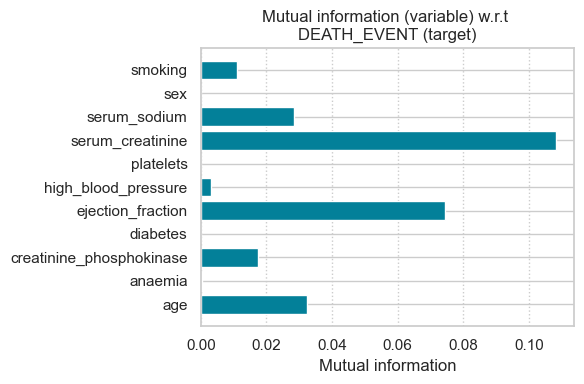

In [72]:
from sklearn.feature_selection import mutual_info_classif

MI_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
               'ejection_fraction', 'high_blood_pressure', 'platelets',
               'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

mutual_infos = (mutual_info_classif(X=heart_faliure_data[MI_features],
                                    y=heart_faliure_data["DEATH_EVENT"], 
                                    n_neighbors=20,
                                    discrete_features=[False, False, False, True, False,
                                                     True, False, False, False, True, False],
                                    random_state=42))

plt.figure(figsize=(6, 4))
plt.barh(y=MI_features, width=mutual_infos, color="#038099")
plt.title("Mutual information (variable) w.r.t \nDEATH_EVENT (target)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

# Insight

**serum_creatinine**, **ejection_fraction**, and **age** turn out to be containing the highest amount of information and the death event is highly dependent on these parameters.

## ML Models and Respective Feature Importances

To extract the feature importances each ML algorithm assigns, we will train models based on different algorithms and then analyze their feature importance scored. The classifiers to be used in this study will be -

**`1. Support Vector Machines with RBF kernel`**

**`2. Decision Tree`**

**`3. Random Forest`**

**`4. Gradient Boosting - XGBoost`**

**`5. Light GBM`**

## 1. Support Vector Machines with Linear kernel

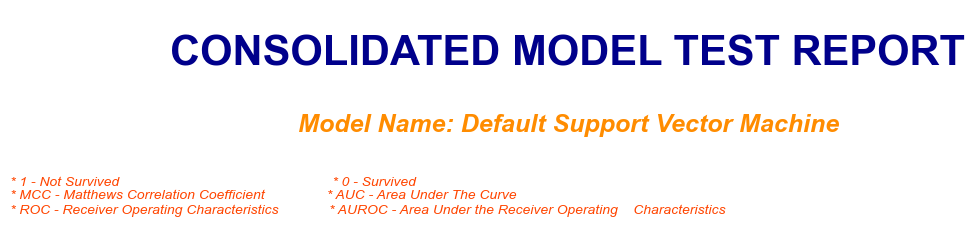

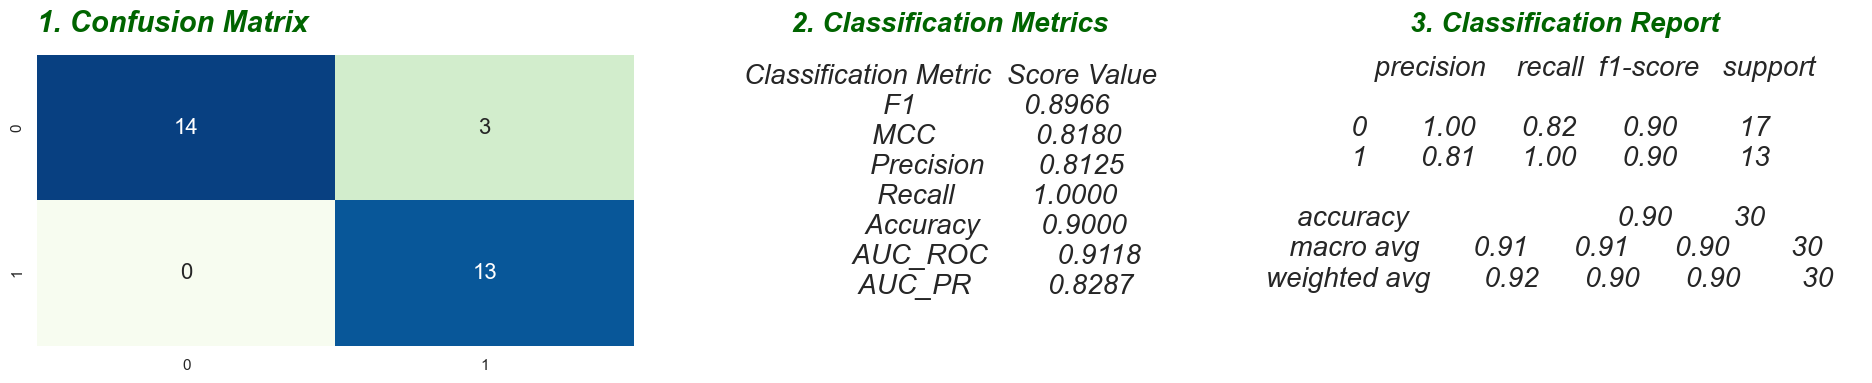

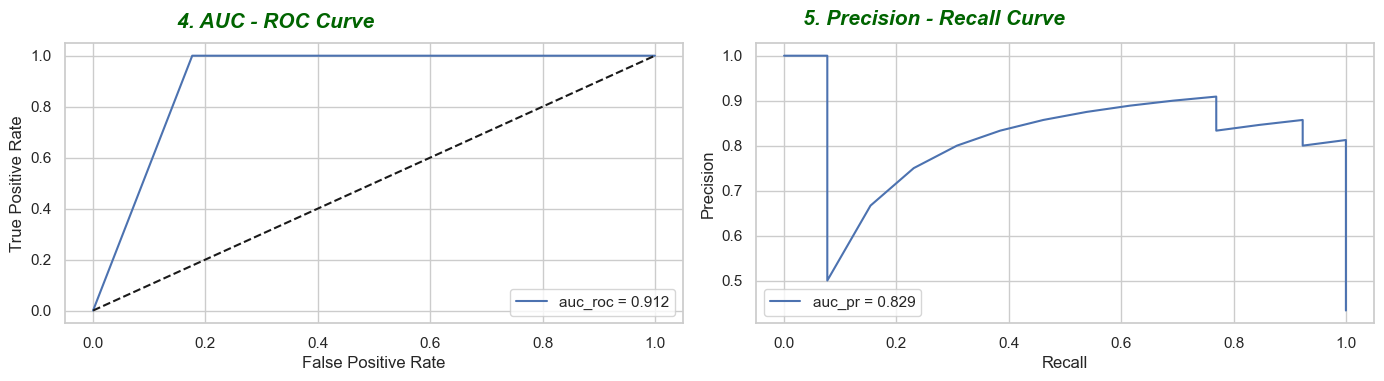

In [92]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(svm, X_test, y_test, model_name="Default Support Vector Machine")


# SVM Hyperparameters Tuning

In [74]:
# GridSearchCV to find best parameters for svm
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

# parameters to build the model on
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                  scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 2)

# fitting the model for grid search 
grid_search.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", grid_search.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", grid_search.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 1000, 'gamma': 0.1}

Best Classifier: SVC(C=1000, gamma=0.1, probability=True, random_state=100)


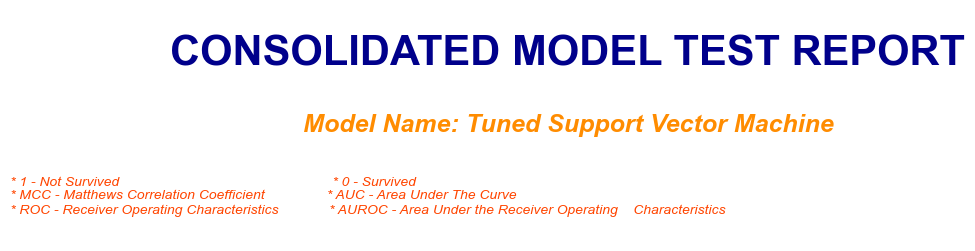

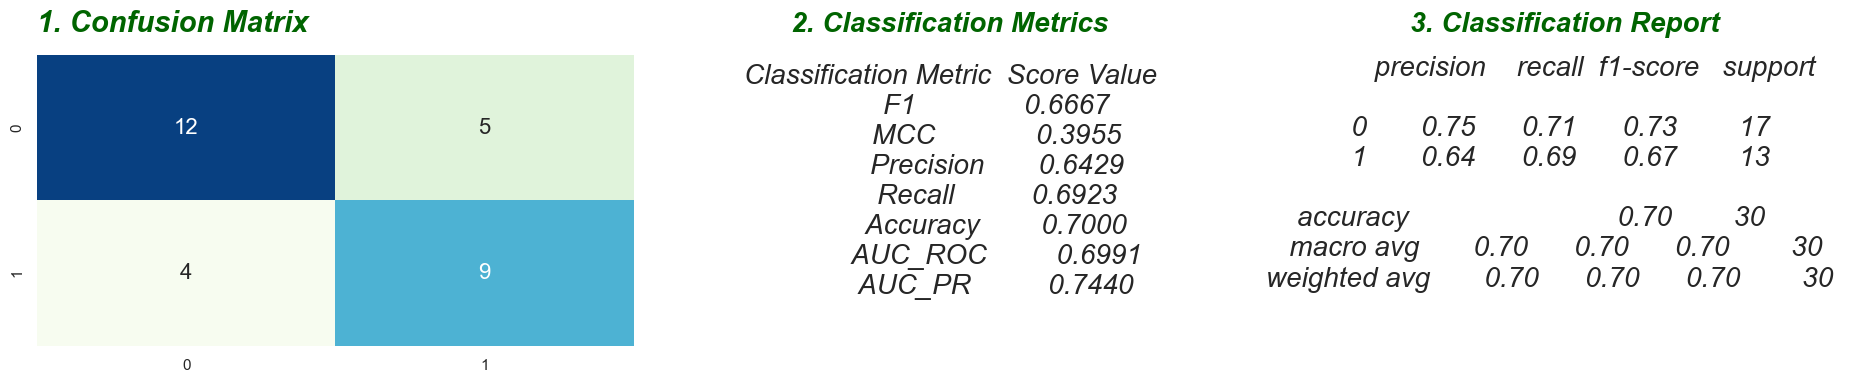

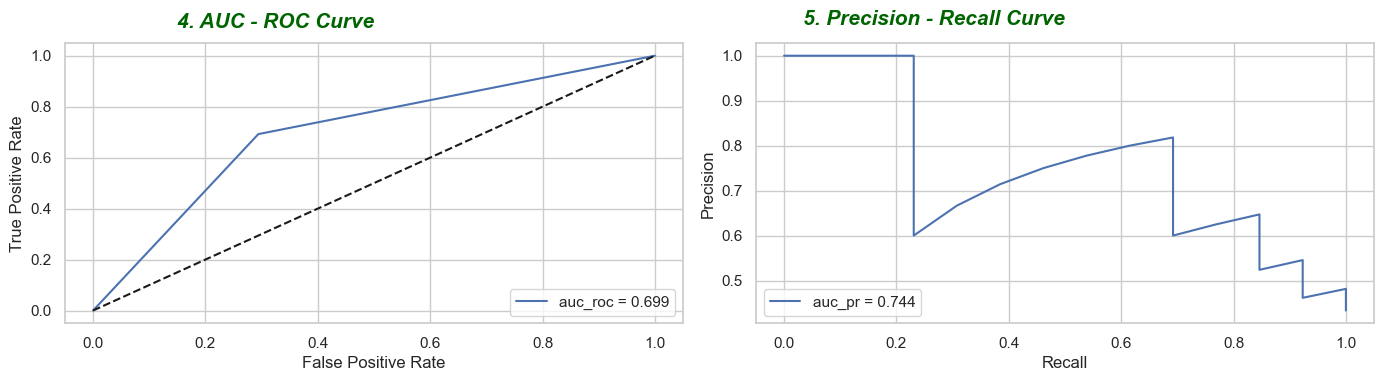

In [75]:
best_svc = grid_search.best_estimator_

best_svc.fit(X_train, y_train.values.ravel())


# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_svc, X_test, y_test, model_name="Tuned Support Vector Machine")

# 2. Decision Tree

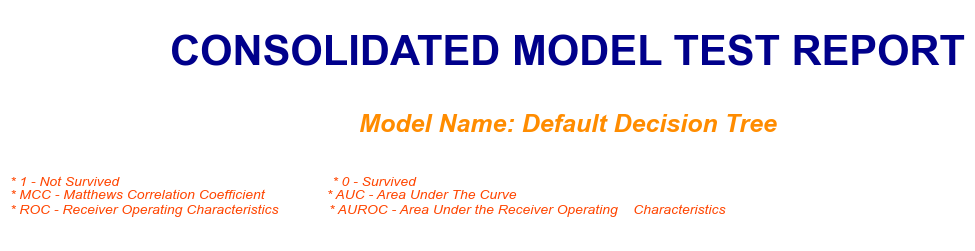

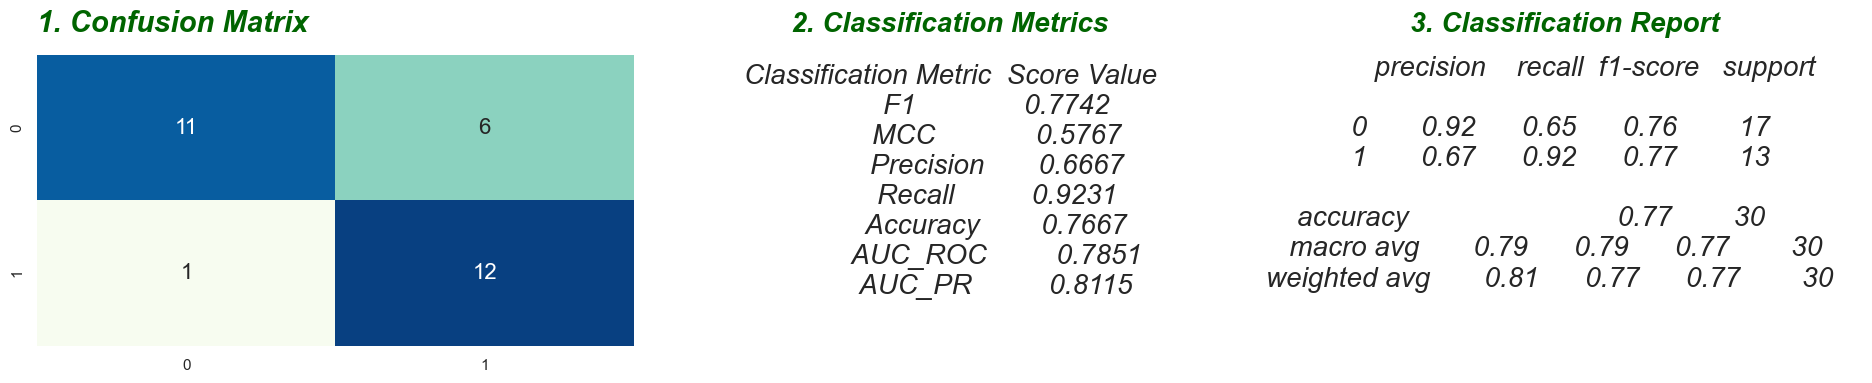

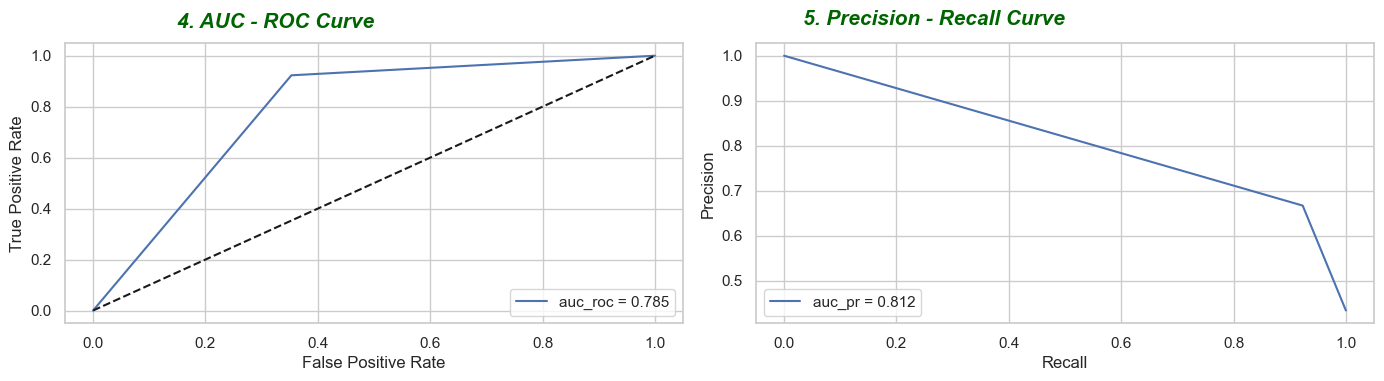

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default Decision Tree")

# Decision Tree Hyperparameters Tuning

In [77]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30), 
#               "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Best Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)


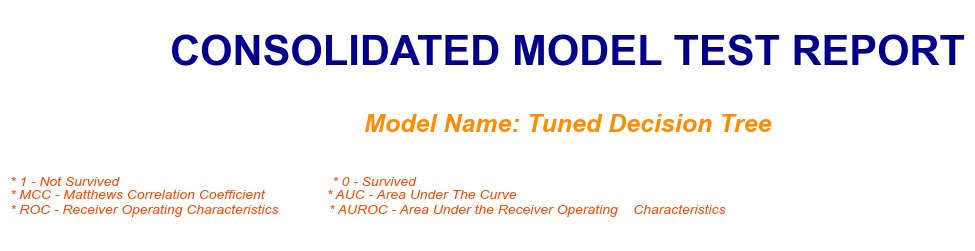

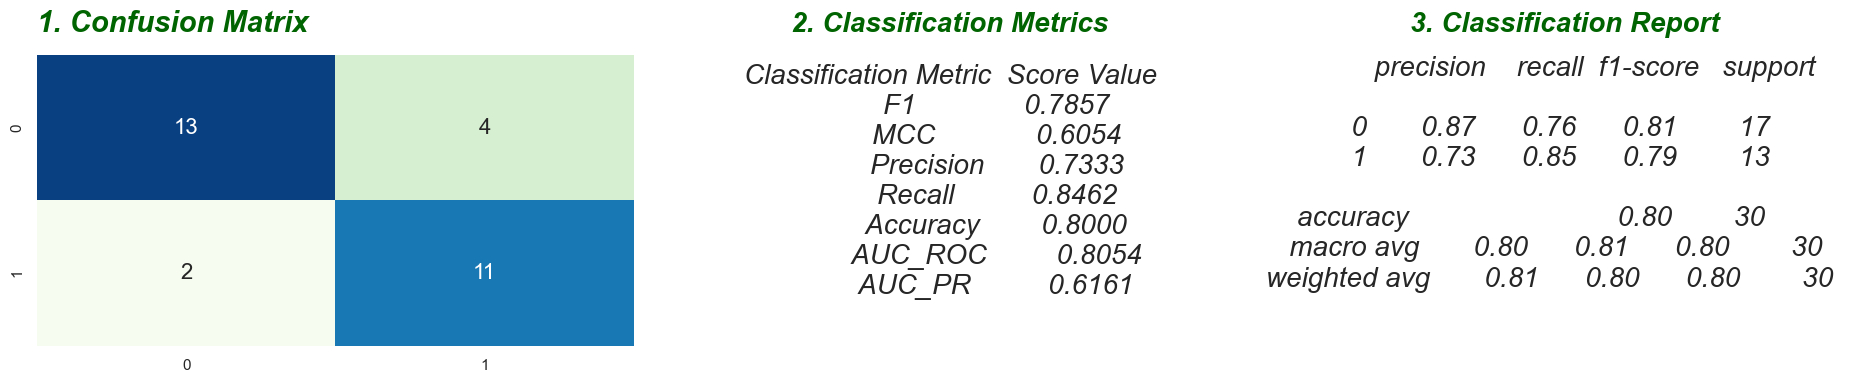

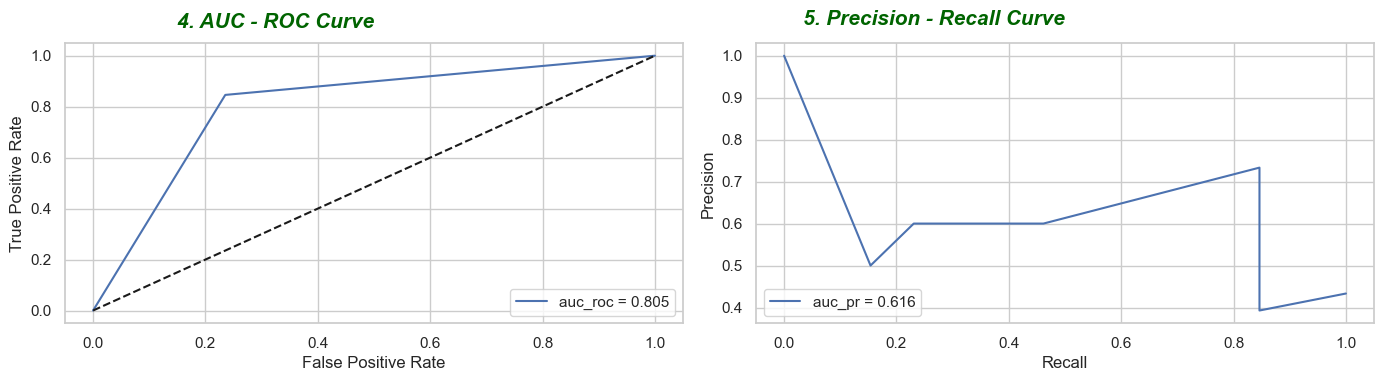

In [78]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_tree, X_test, y_test, model_name="Tuned Decision Tree")

# 3. Random Forest

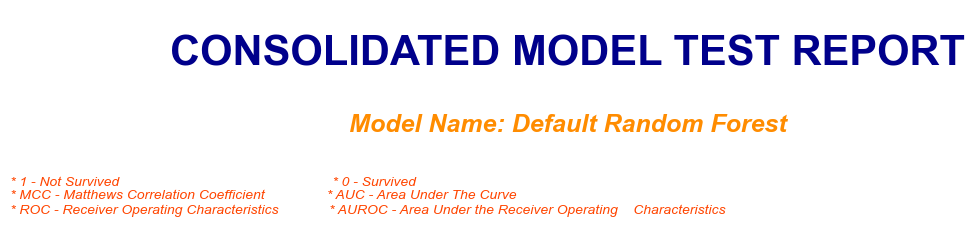

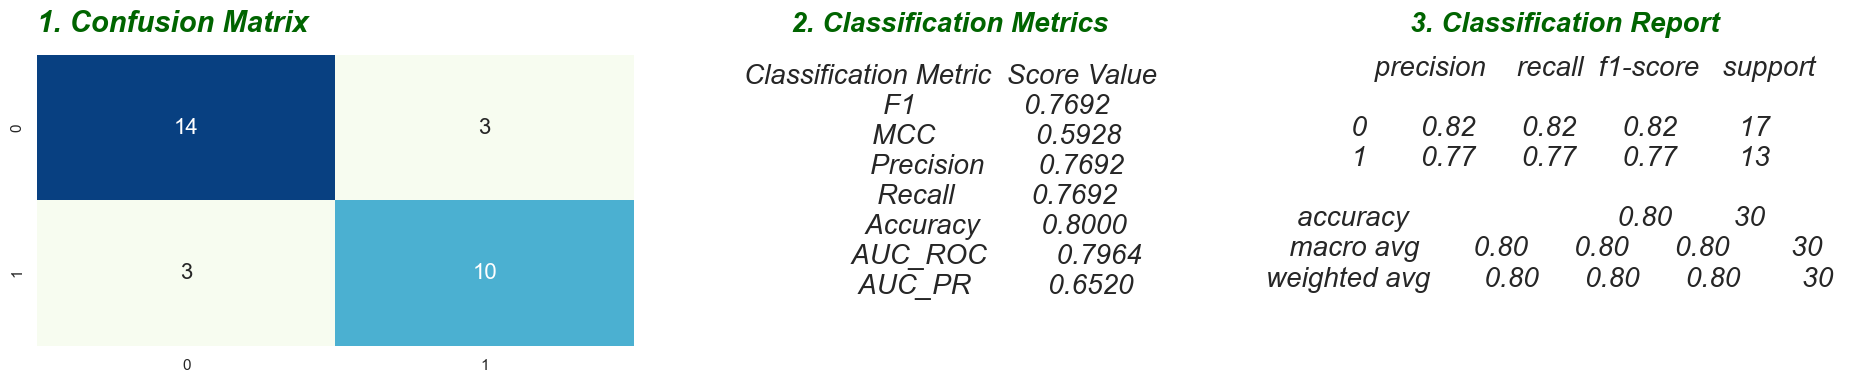

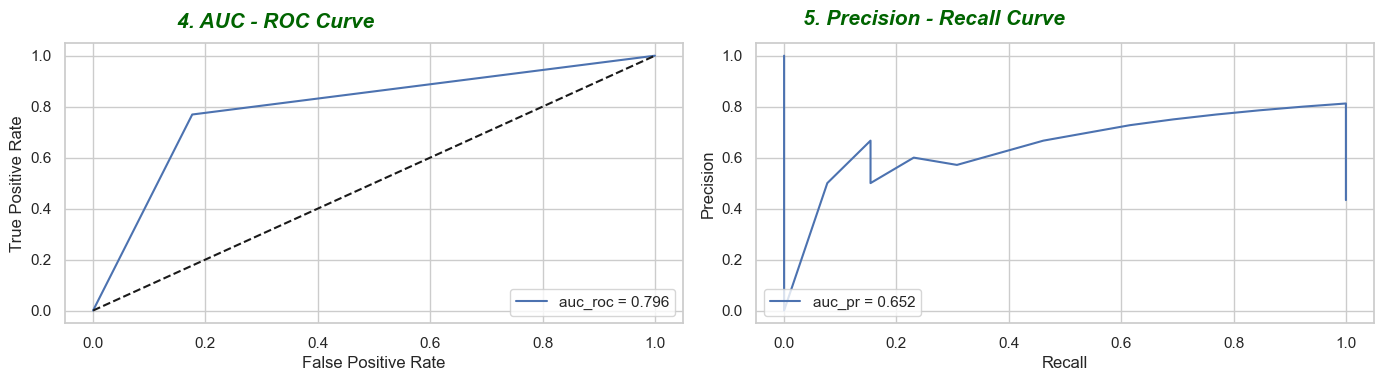

In [79]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(rfc, X_test, y_test, model_name="Default Random Forest")

# Random Forest Hyperparameters Tuning

In [80]:
rn_forest = RandomForestClassifier(n_jobs = -1, random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 10), 
#               "max_features": randint(1, 3), 
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object 
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5) 
    
# fitting the model for grid search 
forest_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", forest_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", forest_grid.best_estimator_) 

Best Parameters: {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 31, 'min_samples_split': 88, 'n_estimators': 6500}

Best Classifier: RandomForestClassifier(max_depth=4, min_samples_leaf=31, min_samples_split=88,
                       n_estimators=6500, n_jobs=-1, random_state=100)


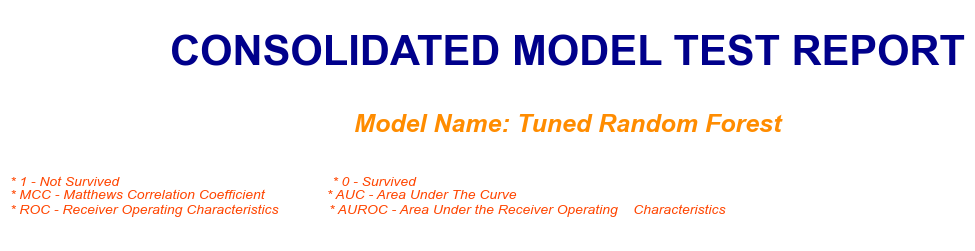

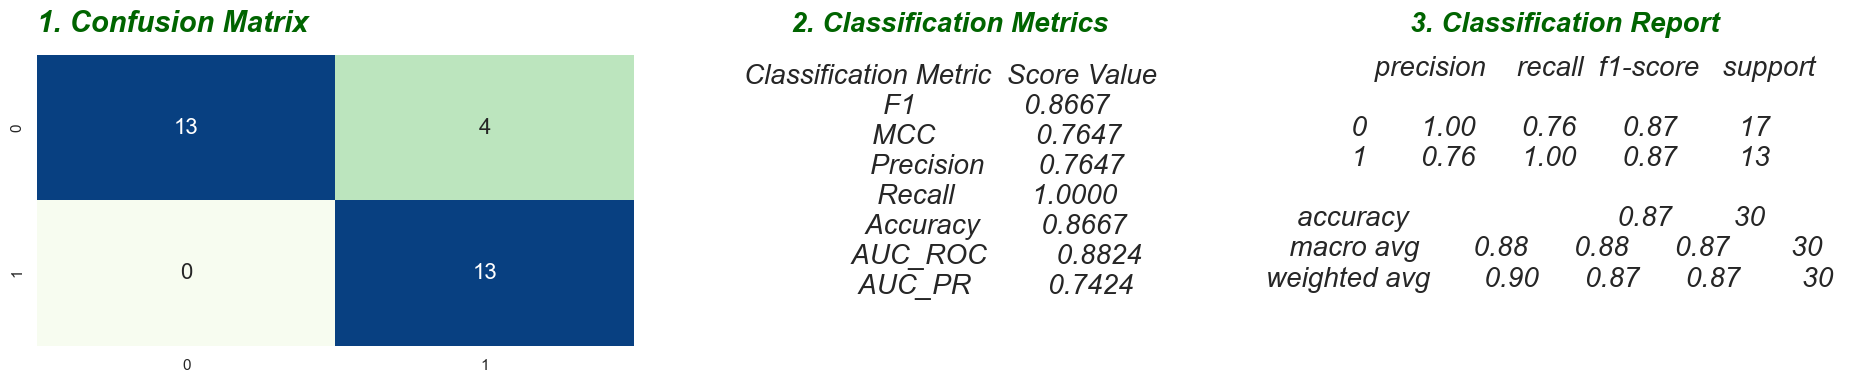

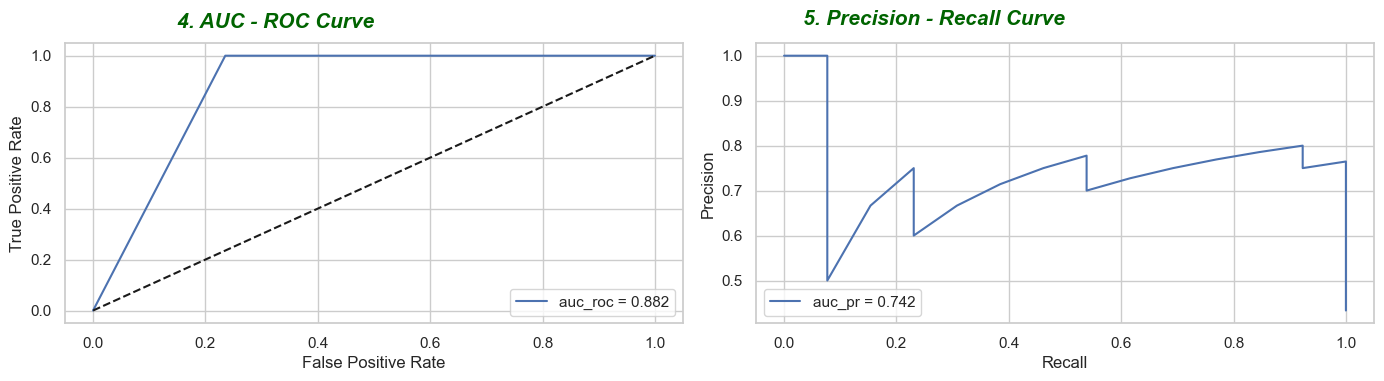

In [81]:
# Random Forest with Best Hypertuned Parameters
best_forest = forest_grid.best_estimator_

best_forest = best_forest.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_forest, X_test, y_test, model_name="Tuned Random Forest")

# 4. Extreme Gradient Boosting - XGBoost

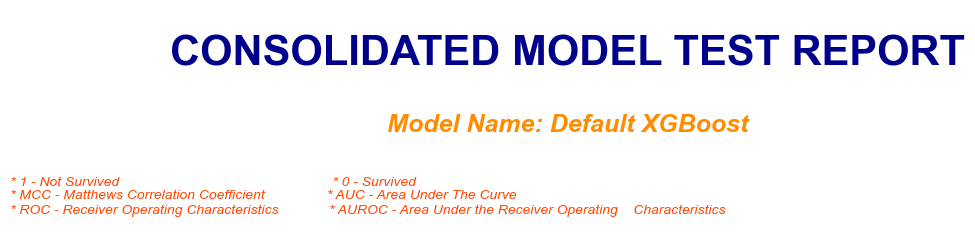

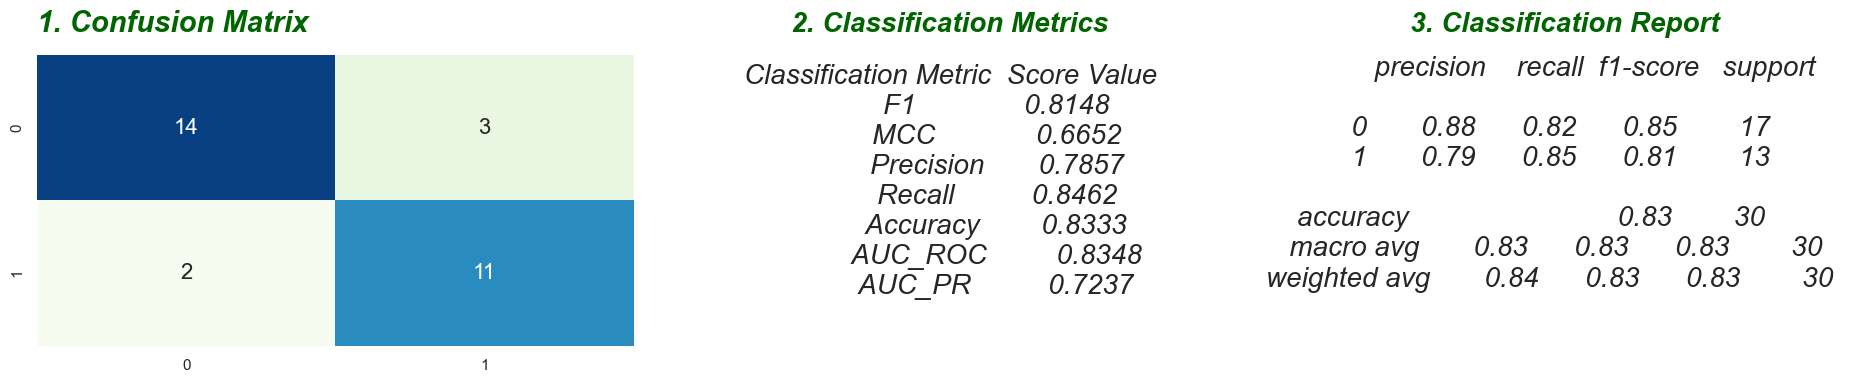

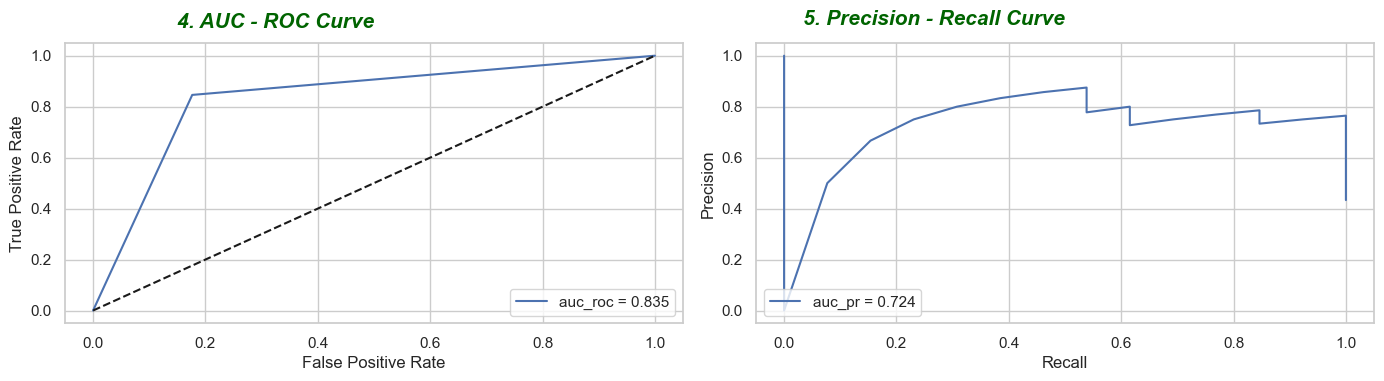

In [82]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(xgb, X_test, y_test, model_name="Default XGBoost")

# XG Boost Hyperparameters Tuning

In [84]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
xgb_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", xgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", xgb_grid.best_estimator_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Best Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)


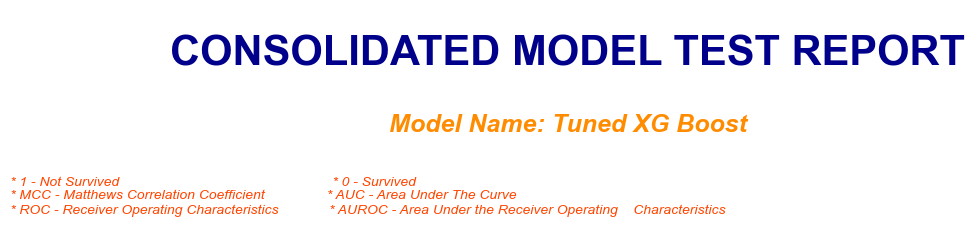

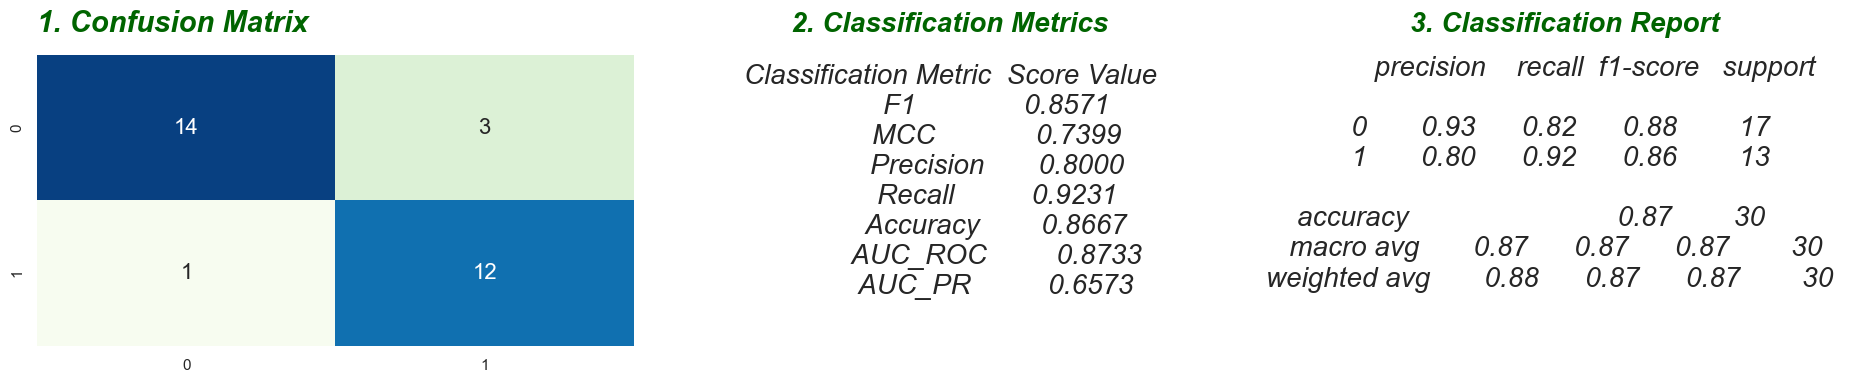

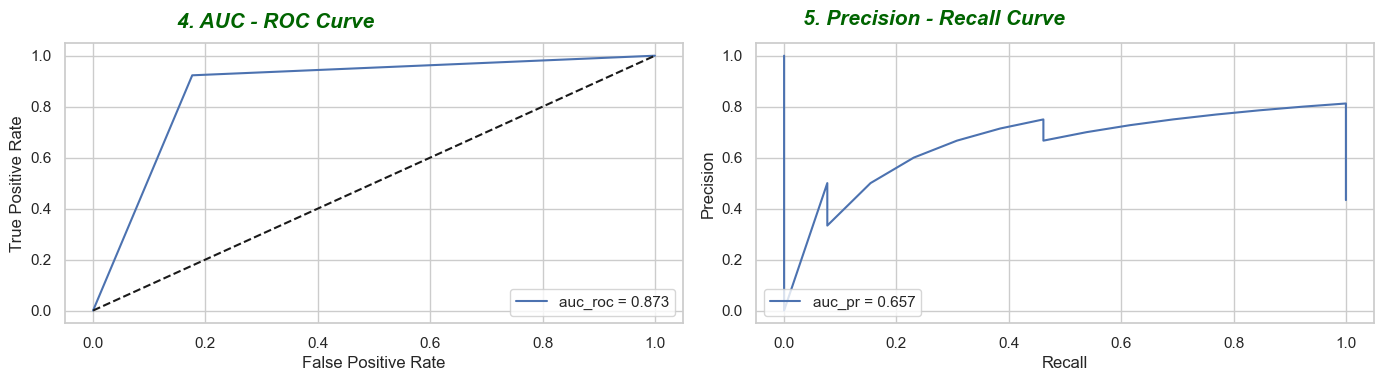

In [85]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_

best_xgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_xgb, X_test, y_test, model_name="Tuned XG Boost")

# 5. Light Gradient Boosted Machine (Light GBM)

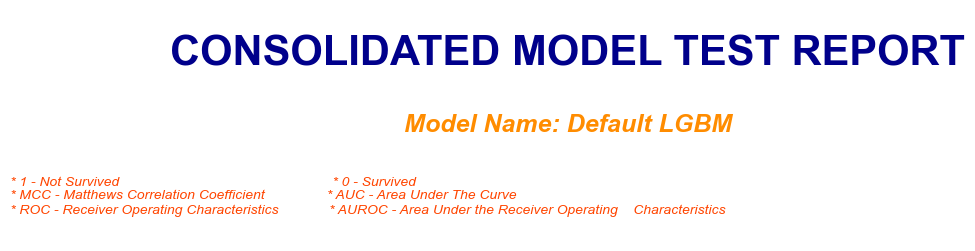

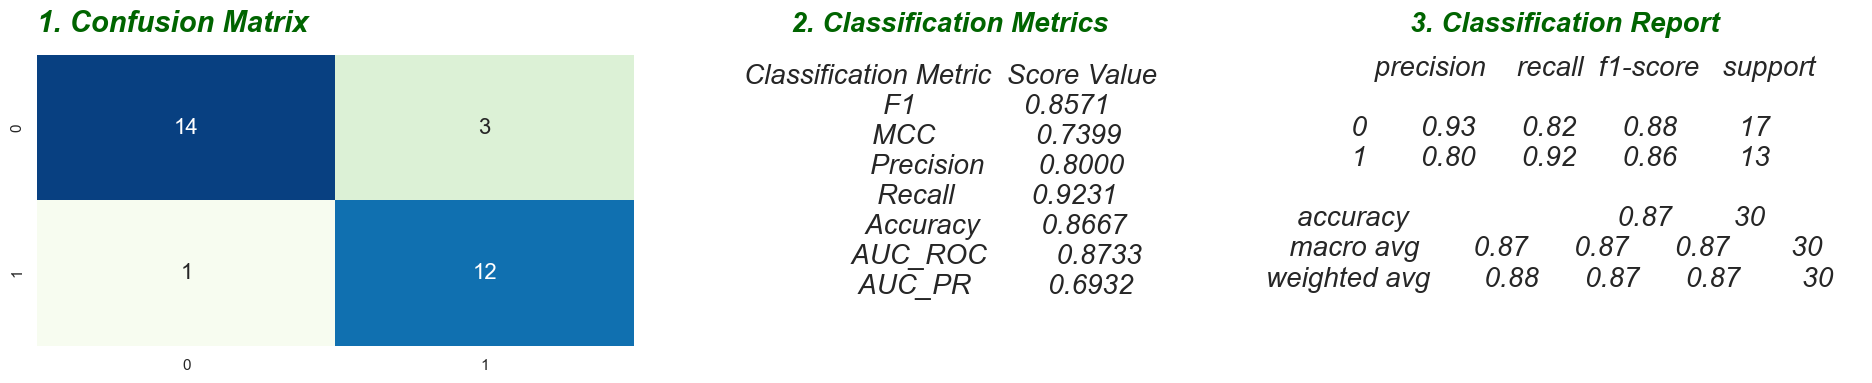

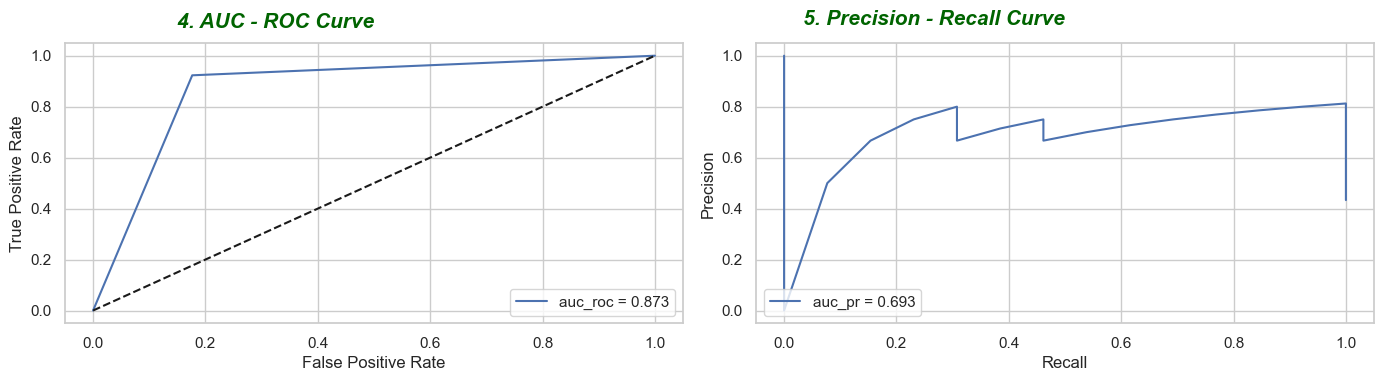

In [86]:
# Instantiate the LGBMClassifier with verbosity set to -1
lgb = LGBMClassifier(objective='binary', n_jobs=-1, random_state=100, verbosity=-1)

lgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(lgb, X_test, y_test, model_name="Default LGBM")

# LGBM Hyperparameter Tuning

In [87]:
# Instantiate the LGBMClassifier with verbosity set to -1
lgb = LGBMClassifier(objective='binary', n_jobs=-1, random_state=100, verbosity=-1)
param_grid = {'max_depth': range(4, 40),
              'num_leaves': range(20, 100),
              'learning_rate': np.arange(0.1, 1.0, 0.1),
              'n_estimators': range(100, 1100, 100),
              'min_child_samples': range(1, 72),
              'subsample': np.arange(0.1, 1.1, 0.1),
              'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
lgb_grid= RandomizedSearchCV(lgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
lgb_grid = lgb_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", lgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", lgb_grid.best_estimator_)

Best Parameters: {'subsample': 0.8, 'num_leaves': 86, 'n_estimators': 100, 'min_child_samples': 12, 'max_depth': 32, 'learning_rate': 0.2, 'colsample_bytree': 0.5}

Best Classifier: LGBMClassifier(colsample_bytree=0.5, learning_rate=0.2, max_depth=32,
               min_child_samples=12, n_jobs=-1, num_leaves=86,
               objective='binary', random_state=100, subsample=0.8,
               verbosity=-1)


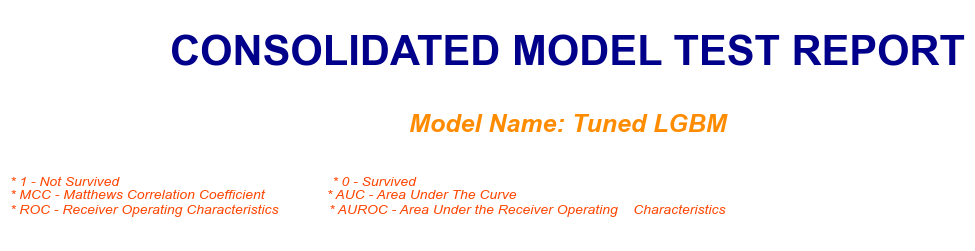

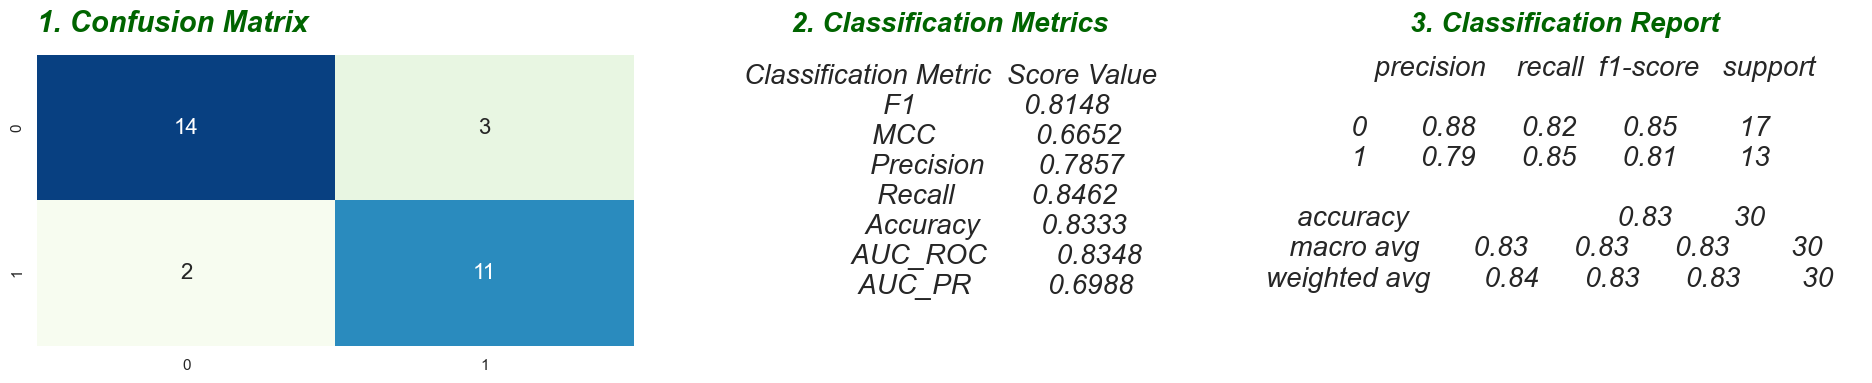

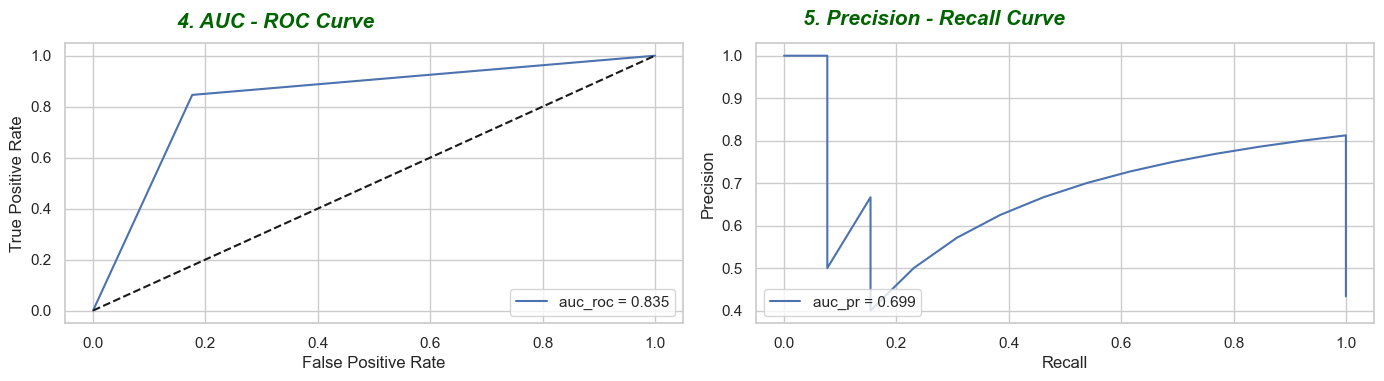

In [88]:
# LGBM with Best Hypertuned Parameters
best_lgb = lgb_grid.best_estimator_

best_lgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_lgb, X_test, y_test, model_name="Tuned LGBM")

# Conclusion from the paper code

# Inferences

**`1. 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time' seem to be the features that are more closely related to the death event.`**

**`2. The event of a heart failure in the old age could be fatal.`**

**`3. The levels of 'ejection_fraction', 'serum_creatinine', 'serum_sodium' play an important role in the event of heart failure or the abnormalities in the levels of these become an important factor in triggerring heart failure condition.`**

**`4. Random Forest, XGBoost and LightGBM turn out to be the better models in predicting the event of death given the vital parameters that effect heart failure of Cardiovascular conditions.`**

**`5. Machine Learning models can prove to be a time saving factor in predicting the event of death and can help the doctors take additional precauionary measures with critical care.`**

**`6. The imbalance in the dataset had been dealt using the SMOTE oversampling of the minority class. SMOTE balanced the no. of instances for each class but the amount of data is still limited.`**

**`7. The accuracy and model performance can be increased as more data is collected and made available for the model to train on. This data limitation, limits the model performance to some extent. As more and more data becomes available, the prediction accuracy and model's ability to act on other similar real-time data could be enhanced.`**

*********************************************************************************************************************
### Contribution  Code :
*

# I will be adding a logistic regression model to the existing machine learning models for comparison. Logistic regression is particularly effective for binary classification problems, and considering that the dataset is relatively small, this model is well-suited for the task. If the dataset were larger, a neural network model might have been a more appropriate choice

# Logistics Regression 

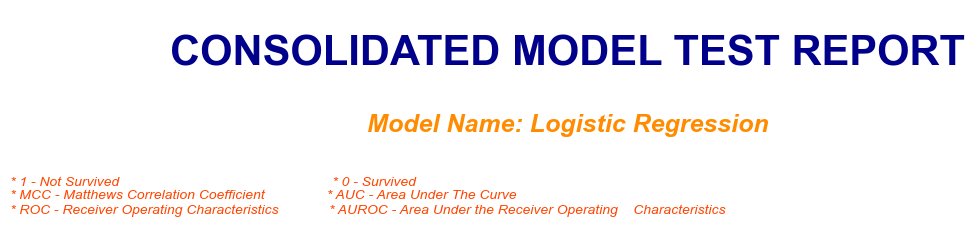

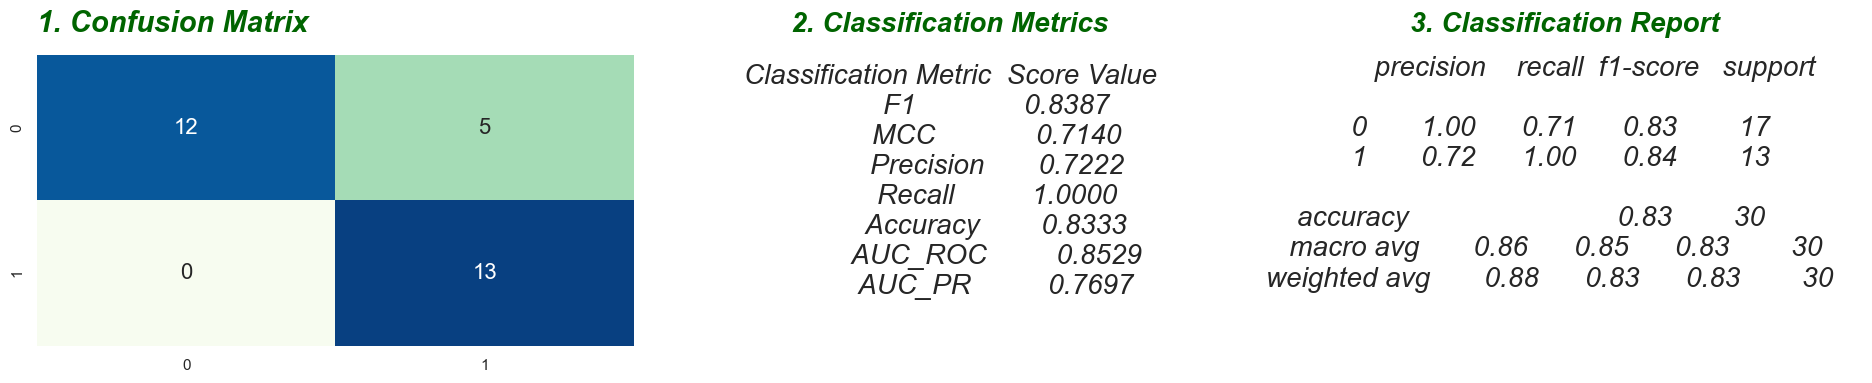

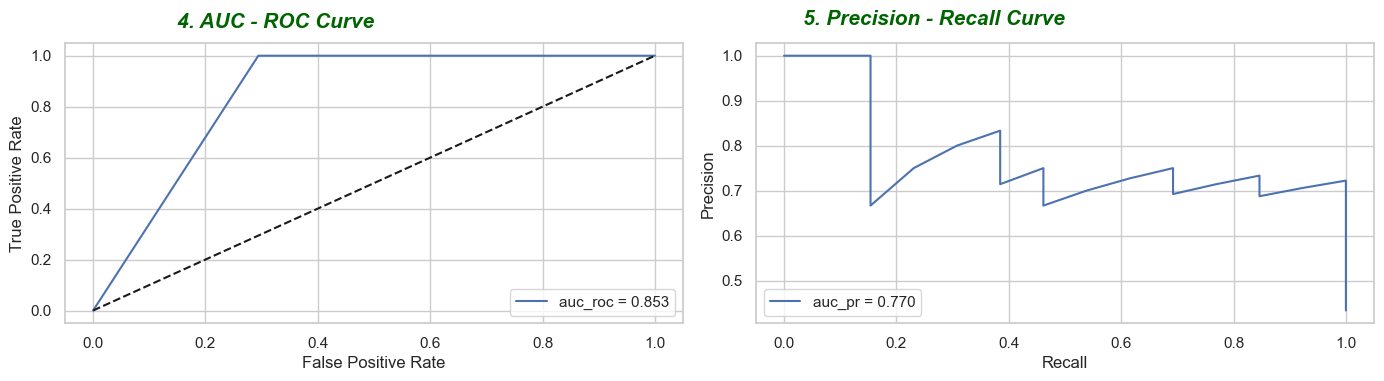

In [89]:
from sklearn.linear_model import LogisticRegression

# Define and fit the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=100)
log_reg.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(log_reg, X_test, y_test, model_name="Logistic Regression")


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
log_reg = LogisticRegression(solver='liblinear', random_state=100)

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Instantiate the RandomizedSearchCV object
log_reg_grid = RandomizedSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, random_state=100)

# Fit the model
log_reg_grid.fit(X_train, y_train.values.ravel())

# Retrieve the best model
best_log_reg = log_reg_grid.best_estimator_

# Print the best parameters and model
print("Best Parameters:", log_reg_grid.best_params_)
print("\nBest Model:", best_log_reg)



Best Parameters: {'penalty': 'l2', 'max_iter': 200, 'class_weight': 'balanced', 'C': 0.23357214690901212}

Best Model: LogisticRegression(C=0.23357214690901212, class_weight='balanced', max_iter=200,
                   random_state=100, solver='liblinear')


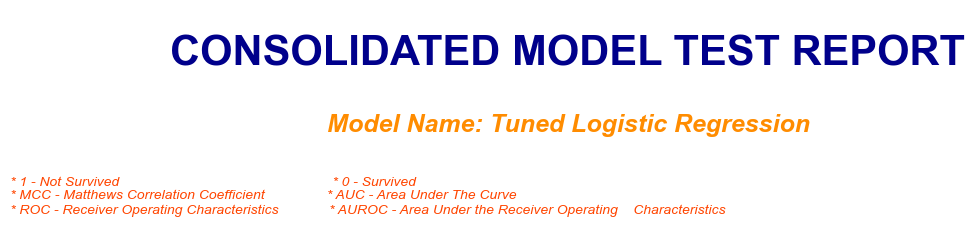

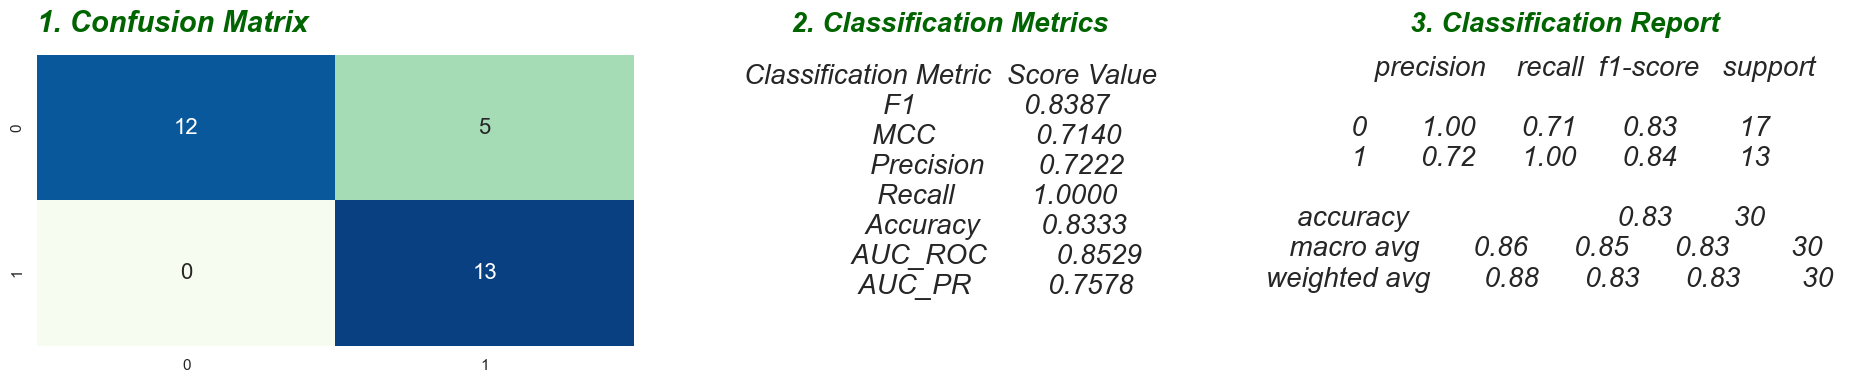

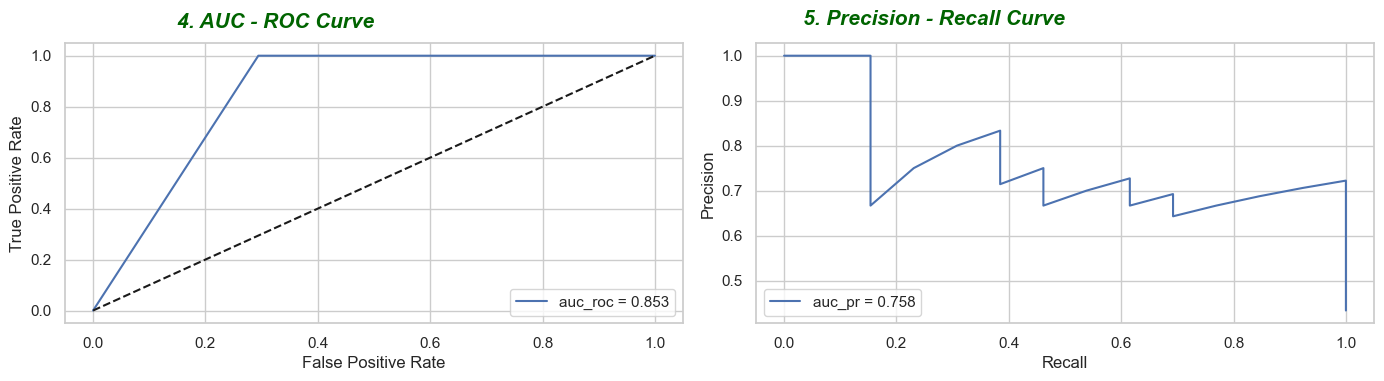

In [91]:
# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_log_reg, X_test, y_test, model_name="Tuned Logistic Regression")

### Results : 
The model achieves an accuracy of 83%, indicating that it correctly classified the majority of instances. The macro average precision and recall are 0.86 and 0.85, respectively, with an average F1-score of 0.83. The weighted averages, which account for the distribution of instances between the two classes, are slightly different but still close to the macro averages
*******************************************************************************************************************************


#### Observations :
*******************************************************************************************************************************
The model's lower recall for class 0 and precision for class 1 suggest areas for improvement. Refining the decision threshold could further enhance the model's ability to balance precision and recall across both classes


### Conclusion and Future Direction :
The addition of logistic regression to the ensemble of machine learning models has proven effective, achieving an accuracy of 0.83, which outperforms both SVC and decision tree models. This suggests that logistic regression is a reliable model for predicting survival in heart failure patients, rivaling more complex models like LightGBM. However, Random Forest still holds the best performance, indicating that further optimization of ensemble methods could yield even better results. Future work could explore hybrid models that combine the strengths of logistic regression and Random Forest, as well as incorporate additional patient data to refine predictive accuracy.
*******************************************************************************************************************************
#### Learnings :
The study highlights the importance of model selection in survival prediction tasks. Logistic regression, a relatively simple model, demonstrated competitive performance against more complex algorithms like LightGBM. This underscores the value of simplicity and interpretability in clinical applications, where transparent decision-making is crucial. The findings also suggest that, while ensemble methods like Random Forest excel in prediction, there is no one-size-fits-all solution, and different models may be more appropriate depending on the specific context and data.

*******************************************************************************************************************************
#### Results Discussion :
The logistic regression model's accuracy of 0.83 places it in close competition with the LightGBM model, confirming its effectiveness in handling the dataset. Its performance, better than SVC and decision tree models, demonstrates its robustness, particularly in binary classification problems with imbalanced data. The superior performance of Random Forest indicates that combining multiple decision trees still provides a significant advantage in capturing complex patterns in the data. The results suggest that while simpler models like logistic regression can perform well, ensemble techniques like Random Forest are still crucial for maximizing predictive performance.



*******************************************************************************************************************************
#### Limitations :

While the logistic regression model performed well, its linear character may have limited its capacity to properly capture nonlinear correlations in the data, which could explain why Random Forest outperformed it. Although hyperparameter adjustment was done to enhance model performance, there may still be limits associated with the models utilized, especially for more complicated patterns that might be better represented by non-linear approaches.

Another notable restriction is the quantity of the dataset, which included 299 cases. The tiny dataset may limit the generalizability of the findings, especially in more diverse clinical populations. If a larger dataset was available, more advanced models, such as deep learning techniques, may be used. These models may provide improved predicted accuracy by better modeling the complex relationships the data, although they typically require larger datasets to avoid overfitting and to realize their full potential.

*******************************************************************************************************************************
#### Future Extension :
The future extensions of this study could look into numerous ways to improve model performance and applicability. One potential approach is to use more powerful machine learning techniques, such as deep learning models, which may better capture complicated, non-linear relationships in the data. Additional clinical and demographic factors, as well as longitudinal data, could be included to improve the model's prediction power and relevance to various patient populations
Furthermore, using ensemble methods that integrate logistic regression with other models such as Random Forest or LightGBM may allow you to take advantage of each model's capabilities, perhaps leading to higher predicted accuracy. Future research could also concentrate on creating interpretable machine learning models that not only perform well but also provide insights into the underlying risk variables, thereby supporting clinical decision-making. Finally, expanding the study to include a larger and more diverse patient population may aid in validating the models across multiple settings, improving the generalizability and consistency of the findings.

# References:

[1]:  Mishra, S. (2022) “A Comparative Study for Time-to-Event Analysis and Survival Prediction for Heart Failure Condition using Machine Learning Techniques”, Journal of Electronics, Electromedical Engineering, and Medical Informatics, 4(3), pp. 115-134. doi: 10.35882/jeeemi.v4i3.225. 